In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(42)
random.seed(42)

**Implementacja symulacji modelu SIS na grafie ER**

**Model SIS (Susceptible-Infected-Susceptible):**
W tym modelu każdy węzeł może być w stanie *podatnym* ($S$) lub *zainfekowanym* ($I$). 
Parametry modelu:
* $\beta$: prawdopodobieństwo zarażenia sąsiada w jednym kroku czasowym.
* $\gamma$: prawdopodobieństwo wyzdrowienia w jednym kroku czasowym.

**Teoria dla ER:**
w podejściu mean-field, stacjonarny stan ułamka zainfekowanych $i_{\infty}$ wynosi:
$$i_{\infty} = 1 - \frac{\gamma}{\beta \langle k \rangle}$$
Gdzie $\langle k \rangle$ to średni stopień wierzchołka w sieci. Epidemia wybucha, gdy $\lambda > \lambda_c$, gdzie $\lambda = \beta/\gamma$, a próg $\lambda_c = 1/\langle k \rangle$.

Próg epidemiczny (lambda_c) dla ER: 0.1001
Parametr modelu (lambda): 3.0000
Wniosek: Epidemia wybucha, jeśli lambda > lambda_c


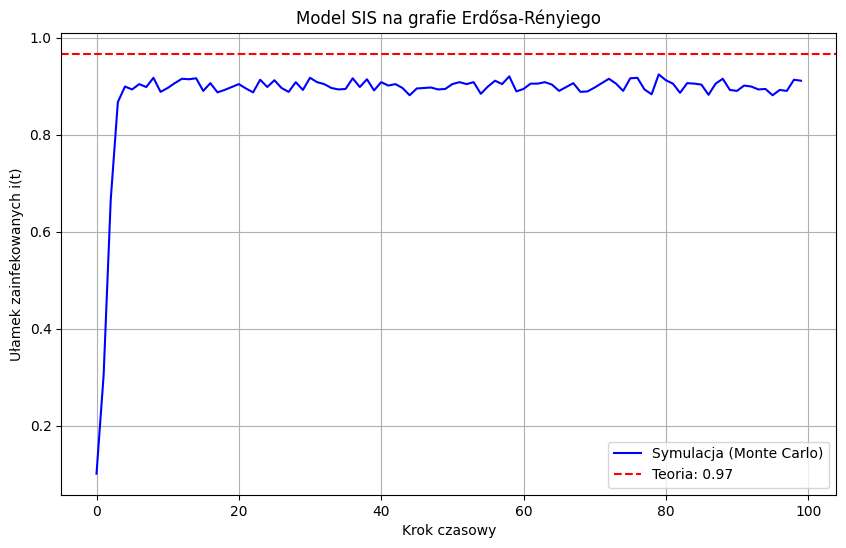

In [17]:
def run_sis_simulation(G, beta, gamma, steps=100, initial_infected_fraction=0.1):
    # Inicjalizacja: losowo wybierz początkowo zainfekowanych
    status = {}
    nodes = list(G.nodes())
    for node in nodes:
        if random.random() < initial_infected_fraction:
            status[node] = 'I'
        else:
            status[node] = 'S'
    
    history_I = []
    
    for _ in range(steps):
        # Zapisz obecną liczbę zainfekowanych
        num_infected = sum(1 for n in nodes if status[n] == 'I')
        history_I.append(num_infected / len(nodes))
        
        new_status = status.copy()
        
        for node in nodes:
            if status[node] == 'I':
                # Próba wyzdrowienia
                if random.random() < gamma:
                    new_status[node] = 'S'
                # Próba zarażenia sąsiadów
                else:
                    for neighbor in G.neighbors(node):
                        if status[neighbor] == 'S':
                            if random.random() < beta:
                                new_status[neighbor] = 'I'
            
        status = new_status
        
    return history_I

# Parametry symulacji
N = 1000      # Liczba węzłów
p = 0.01      # Prawdopodobieństwo krawędzi w ER
avg_k_ER = (N-1)*p # Średni stopień
beta = 0.3    # Prawdopodobieństwo zarażenia
gamma = 0.1   # Prawdopodobieństwo wyzdrowienia

# Generowanie grafu ER
G_ER = nx.erdos_renyi_graph(N, p)

# Uruchomienie symulacji
sis_er_history = run_sis_simulation(G_ER, beta, gamma, steps=100)

# Obliczenia analityczne (z wykładu)
# i_inf = 1 - gamma / (beta * <k>)
theoretical_steady_state = 1 - gamma / (beta * avg_k_ER)
theoretical_steady_state = max(0, theoretical_steady_state)

lambda_c_ER = 1 / avg_k_ER

# 2. Obliczenie parametru modelu (siła wirusa)
lambda_model = beta / gamma

print(f"Próg epidemiczny (lambda_c) dla ER: {lambda_c_ER:.4f}")
print(f"Parametr modelu (lambda): {lambda_model:.4f}")
print("Wniosek: Epidemia wybucha, jeśli lambda > lambda_c")

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.plot(sis_er_history, label='Symulacja (Monte Carlo)', color='blue')
plt.axhline(y=theoretical_steady_state, color='red', linestyle='--', label=f'Teoria: {theoretical_steady_state:.2f}')
plt.title('Model SIS na grafie Erdősa-Rényiego')
plt.xlabel('Krok czasowy')
plt.ylabel('Ułamek zainfekowanych i(t)')
plt.legend()
plt.grid(True)
plt.show()

**P11.2 Implementacja symulacji modelu SIS na sieciach BA**

**Sieci bezskalowe (Scale-free):**
W sieciach typu Barabási-Albert rozkład stopni wierzchołków jest potęgowy. 

**Wnioski analityczne:**
Dla sieci bezskalowych próg epidemii zależy od drugiego momentu rozkładu stopni:
$$\lambda_c = \frac{\langle k \rangle}{\langle k^2 \rangle}$$
Ponieważ w dużych sieciach bezskalowych $\langle k^2 \rangle$ jest bardzo duże (rozbieżne), próg epidemii dąży do 0. Oznacza to, że w takich sieciach wirusy rozprzestrzeniają się niezwykle łatwo i trudno je wygasić (epidemia wybucha prawie zawsze).

Próg epidemiczny (lambda_c) dla BA: 0.0485
Parametr modelu (lambda): 3.0000
Wniosek: Epidemia wybucha, jeśli lambda > lambda_c


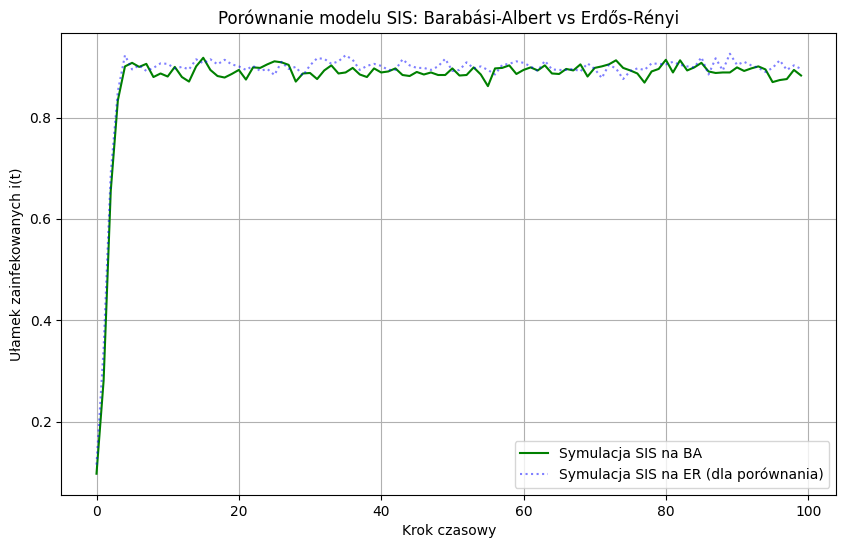

In [4]:
# Parametry dla grafu BA
m = 5 # Liczba krawędzi dodawanych w każdym kroku
G_BA = nx.barabasi_albert_graph(N, m)

# Obliczenie momentów dla teorii
degrees = [d for n, d in G_BA.degree()]
k_avg = np.mean(degrees)
k2_avg = np.mean([d**2 for d in degrees])

# Uruchomienie symulacji (te same parametry beta i gamma co wcześniej)
sis_ba_history = run_sis_simulation(G_BA, beta, gamma, steps=100)

# Próg epidemiczny dla BA
lambda_c_BA = k_avg / k2_avg
lambda_model = beta / gamma

print(f"Próg epidemiczny (lambda_c) dla BA: {lambda_c_BA:.4f}")
print(f"Parametr modelu (lambda): {lambda_model:.4f}")
print("Wniosek: Epidemia wybucha, jeśli lambda > lambda_c")

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.plot(sis_ba_history, label='Symulacja SIS na BA', color='green')
plt.plot(sis_er_history, label='Symulacja SIS na ER (dla porównania)', color='blue', alpha=0.5, linestyle=':')
plt.title('Porównanie modelu SIS: Barabási-Albert vs Erdős-Rényi')
plt.xlabel('Krok czasowy')
plt.ylabel('Ułamek zainfekowanych i(t)')
plt.legend()
plt.grid(True)
plt.show()

**Prównanie sieci ER z BA**

ANALIZA PROGÓW EPIDEMICZNYCH (Parametr lambda)
Siła wirusa (lambda = beta/gamma): 0.0750
1. Sieć ER:
   Próg teoretyczny (lambda_c):    0.1010
2. Sieć BA:
   Próg teoretyczny (lambda_c):    0.0485


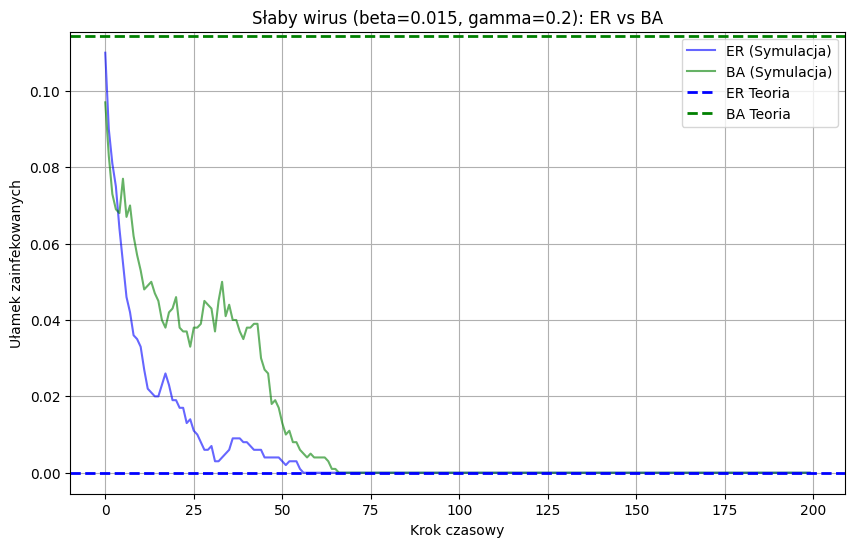

In [21]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

# Parametry eksperymentu
beta_weak = 0.015
gamma_weak = 0.2
steps = 200

# Obliczenie siły wirusa (lambda)
lambda_val = beta_weak / gamma_weak

# 1. Symulacja (Twoja część)
history_er_weak = run_sis_simulation(G_ER, beta_weak, gamma_weak, steps=steps)
history_ba_weak = run_sis_simulation(G_BA, beta_weak, gamma_weak, steps=steps)

# 2. Obliczenia teoretyczne i PROGI

# --- A. Teoria dla ER (Mean Field) ---
degrees_ER = [d for n, d in G_ER.degree()]
avg_k_ER = np.mean(degrees_ER)

# Próg epidemiczny dla ER: lambda_c = 1 / <k>
lambda_c_ER = 1 / avg_k_ER

# Teoretyczny stan stacjonarny dla ER
theory_er = 1 - 1 / (lambda_val * avg_k_ER)
theory_er = max(0, theory_er)  # Jeśli ujemne, to znaczy że epidemia wygasa (0)

# --- B. Teoria dla BA (Heterogeneous Mean Field - HMF) ---
degrees_BA = [d for n, d in G_BA.degree()]
avg_k_BA = np.mean(degrees_BA)
k2_avg_BA = np.mean([d**2 for d in degrees_BA]) # Średnia z kwadratów stopni

# Próg epidemiczny dla BA: lambda_c = <k> / <k^2>
lambda_c_BA = avg_k_BA / k2_avg_BA

# Rozwiązanie równania HMF dla stanu stacjonarnego BA
def hmf_equation(Theta):
    # Równanie: Theta = (1/<k>) * Suma[ k * P(k) * (lambda*k*Theta)/(1+lambda*k*Theta) ]
    numerator = sum([k * (lambda_val * k * Theta) / (1 + lambda_val * k * Theta) for k in degrees_BA])
    denominator = sum(degrees_BA) 
    return Theta - numerator / denominator

theta_solution = fsolve(hmf_equation, x0=0.5)[0]
theory_ba = np.mean([(lambda_val * k * theta_solution) / (1 + lambda_val * k * theta_solution) for k in degrees_BA])


print(f"ANALIZA PROGÓW EPIDEMICZNYCH (Parametr lambda)")

print(f"Siła wirusa (lambda = beta/gamma): {lambda_val:.4f}")

print(f"1. Sieć ER:")
print(f"   Próg teoretyczny (lambda_c):    {lambda_c_ER:.4f}")


print(f"2. Sieć BA:")
print(f"   Próg teoretyczny (lambda_c):    {lambda_c_BA:.4f}")


# 3. Rysowanie wykresu
plt.figure(figsize=(10, 6))

# Wyniki symulacji
plt.plot(history_er_weak, label='ER (Symulacja)', color='blue', alpha=0.6)
plt.plot(history_ba_weak, label='BA (Symulacja)', color='green', alpha=0.6)

# Linie teoretyczne
plt.axhline(y=theory_er, color='blue', linestyle='--', linewidth=2, label=f'ER Teoria')
plt.axhline(y=theory_ba, color='green', linestyle='--', linewidth=2, label=f'BA Teoria')

plt.title(f'Słaby wirus (beta={beta_weak}, gamma={gamma_weak}): ER vs BA')
plt.xlabel('Krok czasowy')
plt.ylabel('Ułamek zainfekowanych')
plt.legend()
plt.grid(True)
plt.show()

**P11.3 Implementacja innego modelu - wybraliśmy model SIR**

W tym zadaniu zaimplementowano model **SIR** (Susceptible-Infected-Recovered), który jest klasycznym modelem epidemicznym wspomnianym we wstępie wykładu.

**Różnica względem SIS:**
W modelu SIR jednostka przechodzi przez stany $S \rightarrow I \rightarrow R$. Stan $R$ (Recovered/Removed) oznacza trwałą odporność lub usunięcie z populacji. Jednostka w stanie $R$ nie wraca do stanu $S$, co oznacza, że epidemia w końcu wygaśnie (liczba zainfekowanych spadnie do zera), a pewna część populacji pozostanie "ozdrowieńcami".

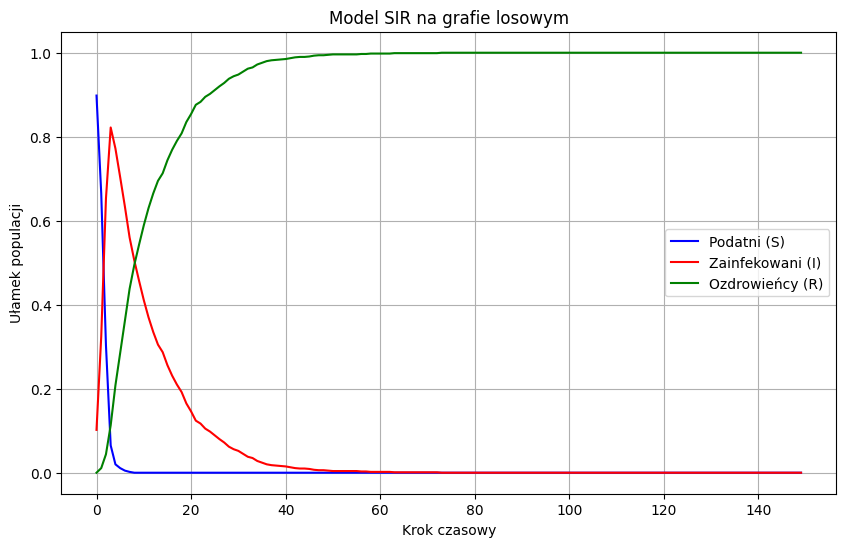

In [5]:
def run_sir_simulation(G, beta, gamma, steps=100, initial_infected_fraction=0.1):
    status = {}
    nodes = list(G.nodes())
    # Inicjalizacja
    for node in nodes:
        if random.random() < initial_infected_fraction:
            status[node] = 'I'
        else:
            status[node] = 'S'
            
    history_S = []
    history_I = []
    history_R = []
    
    for _ in range(steps):
        # Zliczanie
        s_count = sum(1 for n in nodes if status[n] == 'S')
        i_count = sum(1 for n in nodes if status[n] == 'I')
        r_count = sum(1 for n in nodes if status[n] == 'R')
        
        history_S.append(s_count / len(nodes))
        history_I.append(i_count / len(nodes))
        history_R.append(r_count / len(nodes))
        
        new_status = status.copy()
        
        for node in nodes:
            if status[node] == 'I':
                # Próba wyzdrowienia (przejście I -> R)
                if random.random() < gamma:
                    new_status[node] = 'R'
                # Próba zarażenia sąsiadów
                else:
                    for neighbor in G.neighbors(node):
                        if status[neighbor] == 'S':
                            if random.random() < beta:
                                new_status[neighbor] = 'I'
        
        status = new_status
        # Jeśli brak zainfekowanych, przerywamy wcześniej
        if i_count == 0:
            # Wypełnij resztę historii ostatnimi wartościami
            remaining_steps = steps - len(history_I)
            history_S.extend([s_count/len(nodes)] * remaining_steps)
            history_I.extend([0] * remaining_steps)
            history_R.extend([r_count/len(nodes)] * remaining_steps)
            break
            
    return history_S, history_I, history_R

# Symulacja SIR na grafie ER
history_S, history_I, history_R = run_sir_simulation(G_ER, beta, gamma, steps=150)

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.plot(history_S, label='Podatni (S)', color='blue')
plt.plot(history_I, label='Zainfekowani (I)', color='red')
plt.plot(history_R, label='Ozdrowieńcy (R)', color='green')
plt.title('Model SIR na grafie losowym')
plt.xlabel('Krok czasowy')
plt.ylabel('Ułamek populacji')
plt.legend()
plt.grid(True)
plt.show()

**P11.4 Zmodyfikowany model głosowania z propagandą**

**Klasyczny model wyborcy (Voter Model):**
W każdym węźle znajduje się opinia $\sigma_i = \pm 1$.W każdym kroku losowy węzeł zmienia opinię na podstawie sumy opinii swoich sąsiadów.

**Modyfikacja - Efekt propagandy/ideologii:**
Wprowadzamy dodatkowy czynnik "pola zewnętrznego" (propagandy). Z prawdopodobieństwem $p_{prop}$ agent ignoruje sąsiadów i przyjmuje narzuconą opinię (np. $+1$, reprezentującą wpływ mediów lub silną ideologię), w przeciwnym razie zachowuje się jak w klasycznym modelu.

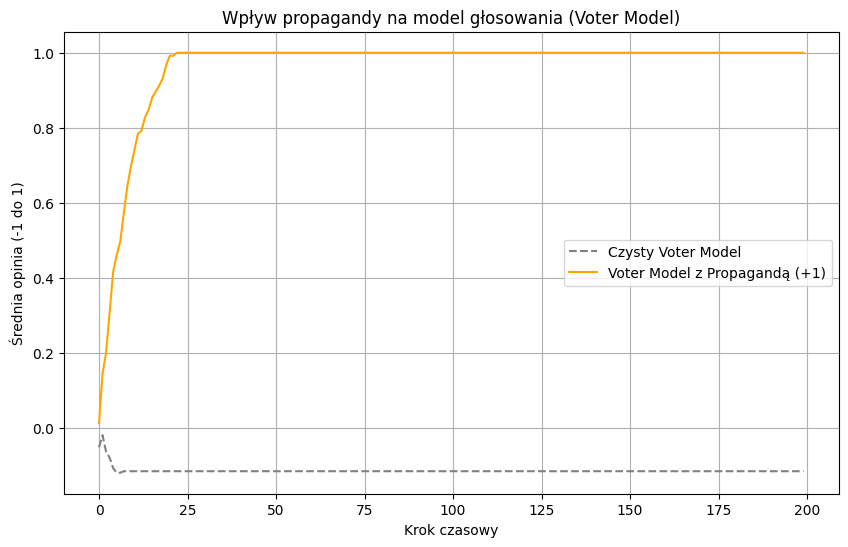

In [ ]:
def run_voter_model_propaganda(G, steps=500, propaganda_prob=0.05, propaganda_opinion=1):
    # Inicjalizacja opinii losowo -1 lub 1
    opinions = {node: random.choice([-1, 1]) for node in G.nodes()}
    nodes = list(G.nodes())
    
    avg_opinion_history = []
    
    for _ in range(steps):
        avg_op = sum(opinions.values()) / len(nodes)
        avg_opinion_history.append(avg_op)
        
        # Asynchroniczna aktualizacja (wybieramy losowego agenta)
        # W jednej epoce wykonujemy N aktualizacji
        for _ in range(len(nodes)):
            target_node = random.choice(nodes)
            
            # Modyfikacja: Wpływ propagandy
            if random.random() < propaganda_prob:
                opinions[target_node] = propaganda_opinion
            else:
                # Klasyczny mechanizm voter model (sąsiedzi)
                neighbors = list(G.neighbors(target_node))
                if neighbors:
                    # Wybierz losowego sąsiada i przyjmij jego opinię (standardowy voter)
                    # LUB podejmowanie decyzji na podstawie większości:
                    neighbor_opinions = [opinions[n] for n in neighbors]
                    
                    # Wariant: Przyjmij znak sumy opinii sąsiadów (majority rule)
                    m_i = sum(neighbor_opinions)
                    if m_i != 0:
                        opinions[target_node] = 1 if m_i > 0 else -1
                    # Jeśli remis, zachowaj opinię (lub losuj)
        
    return avg_opinion_history

# Symulacja
# Graf Watts-Strogatz (mały świat), dobrze oddaje struktury społeczne
G_WS = nx.watts_strogatz_graph(n=500, k=6, p=0.1)

# Bez propagandy
history_pure = run_voter_model_propaganda(G_WS, steps=200, propaganda_prob=0.0)

# Z propagandą
history_prop = run_voter_model_propaganda(G_WS, steps=200, propaganda_prob=0.1, propaganda_opinion=1)

plt.figure(figsize=(10, 6))
plt.plot(history_pure, label='Czysty Voter Model', color='gray', linestyle='--')
plt.plot(history_prop, label='Voter Model z Propagandą (+1)', color='orange')
plt.title('Wpływ propagandy na model głosowania (Voter Model)')
plt.xlabel('Krok czasowy')
plt.ylabel('Średnia opinia (-1 do 1)')
plt.legend()
plt.grid(True)
plt.show()

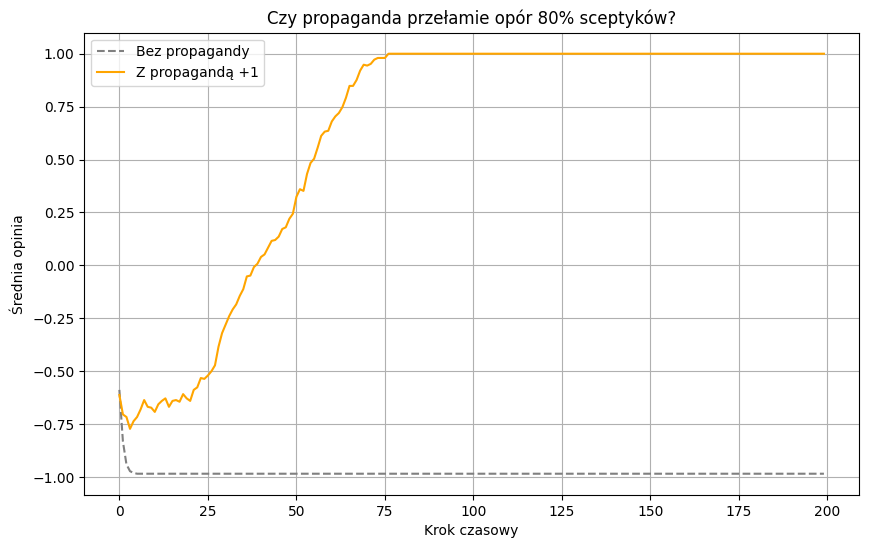

In [25]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def run_voter_model_propaganda(G, steps=500, propaganda_prob=0.05, propaganda_opinion=1):
    # 80% spoleczenstwa jest na NIE
    opinions = {}
    nodes = list(G.nodes())
    
    for node in nodes:
        # Losujemy liczbę od 0 do 1
        if random.random() < 0.8:  # 80% szans
            opinions[node] = -1    # Opinia na NIE
        else:
            opinions[node] = 1     # Opinia na TAK (20%)
            
    avg_opinion_history = []
    
    for _ in range(steps):
        # Obliczamy średnią opinię 
        avg_op = sum(opinions.values()) / len(nodes)
        avg_opinion_history.append(avg_op)
        
        # Asynchroniczna aktualizacja (wybieramy losowego agenta)
        for _ in range(len(nodes)):
            target_node = random.choice(nodes)
            
            # 1. Wpływ propagandy
            if random.random() < propaganda_prob:
                opinions[target_node] = propaganda_opinion
            else:
                # 2. Mechanizm większościowy (sąsiedzi)
                neighbors = list(G.neighbors(target_node))
                if neighbors:
                    neighbor_opinions = [opinions[n] for n in neighbors]
                    m_i = sum(neighbor_opinions)
                    
                    if m_i != 0:
                        opinions[target_node] = 1 if m_i > 0 else -1
                    # Jeśli remis (0), opinia bez zmian
        
    return avg_opinion_history

# --- Część wykonawcza ---

# Generowanie grafu Wattsa-Strogatza
G_WS = nx.watts_strogatz_graph(n=500, k=6, p=0.1)

# Symulacja 1: Bez propagandy
# Spodziewamy się, że większość (-1) zdominuje mniejszość i opinia spadnie do -1
history_pure = run_voter_model_propaganda(G_WS, steps=200, propaganda_prob=0.0)

# Symulacja 2: Z propagandą (+1)
# Sprawdzamy, czy propaganda "wyciągnie" wynik z -0.6 do +1 mimo oporu 80% społeczeństwa
history_prop = run_voter_model_propaganda(G_WS, steps=200, propaganda_prob=0.1, propaganda_opinion=1)

# Wizualizacja
plt.figure(figsize=(10, 6))

plt.plot(history_pure, label='Bez propagandy', color='gray', linestyle='--')
plt.plot(history_prop, label='Z propagandą +1', color='orange')

plt.title('Czy propaganda przełamie opór 80% sceptyków?')
plt.xlabel('Krok czasowy')
plt.ylabel('Średnia opinia')
plt.legend()
plt.grid(True)
plt.show()